<a href="https://colab.research.google.com/github/managucam/managucam.github.io/blob/main/Visualization_Mapping_Global_Earthquake_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is an enhacement of the project: http://introtopython.org/visualization_earthquakes.html

In [1]:
# This just lets the output of the following code samples
#  display inline on this page, at an appropriate size.
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

In [6]:
!apt-get install -q libgeos-3.6.2
!apt-get install -q libgeos-dev
!pip install git+https://github.com/matplotlib/basemap#subdirectory=packages/basemap
!pip install -q pyproj==1.9.6

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Cloning https://github.com/matplotlib/basemap to /tmp/pip-req-build-1k1gx2ia
  Running command git clone -q https://github.com/matplotlib/basemap /tmp/pip-req-build-1k1gx2ia
     |████████████████████████████████| 30.5 MB 1.2 MB/s 
     |████████████████████████████████| 219 kB 63.5 MB/s 
  Created wheel for basemap: filename=basemap-1.3.0+dev-cp37-cp37m-linux_x86_64.whl size=195425 sha256=79d478c6aa87212b8d9bc891268ff754a09c6af06d46bbbd20d9f9279cc2381c
  Stored in directory: /tmp/pip-ephem-wheel-cache-5m1w9yea/wheels/1b/eb/8a/72bc189cb62b

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


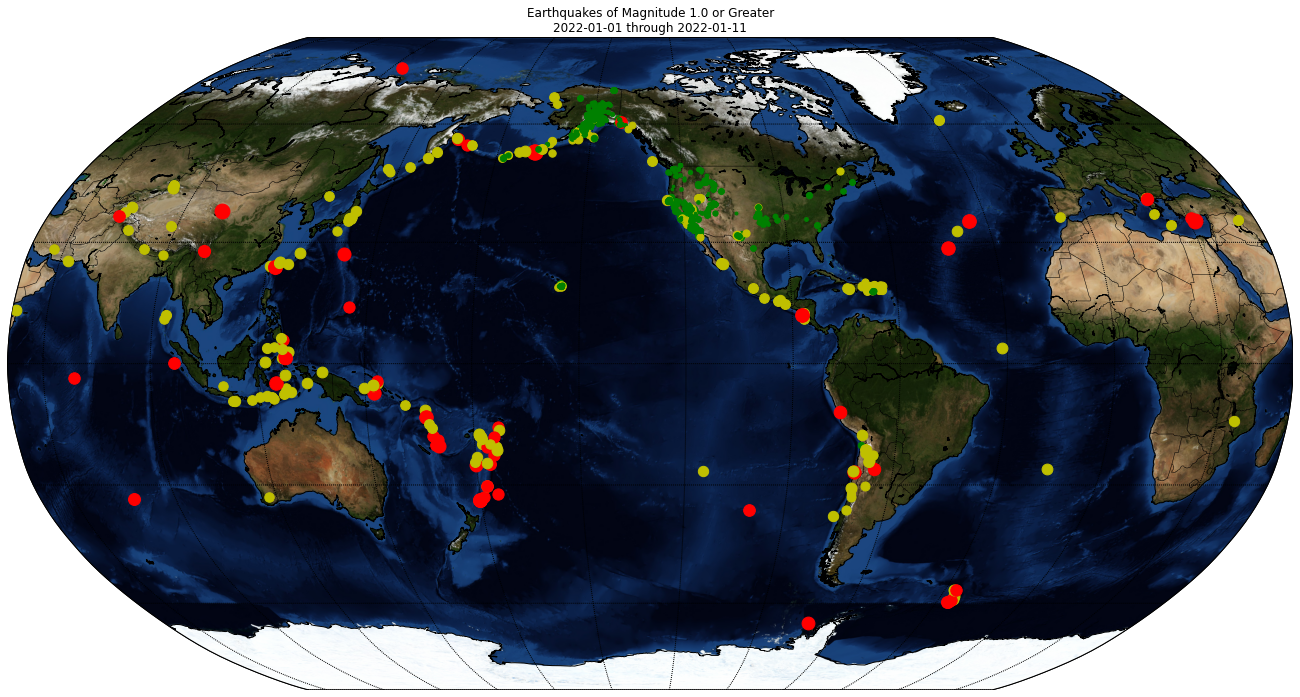

In [79]:
import requests
import pandas as pd
import io

def get_historic_data(minmagnitude='1', start='2021-12-01', end='2021-12-31'):
  url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=text&starttime={start}&endtime={end}&minmagnitude={minmagnitude}'.format(
      minmagnitude=minmagnitude,
      start=start,
      end=end
  )
  resp = requests.get(url)
  data = resp.text
  mat = [p.split('|') for p in data.split('\n')]
  df = pd.DataFrame.from_records(mat, index=0)
  headers = df.iloc[0]
  df = pd.DataFrame(df.values[1:], columns=headers)
  df.drop(df.tail(1).index,inplace=True)
  df['Latitude'] = df.Latitude.astype(float)
  df['Longitude'] = df.Longitude.astype(float)
  df['Magnitude'] = df.Magnitude.astype(float)
  return df

df = get_historic_data(start='2022-01-01', end='2022-01-12')
lats = df['Latitude'].to_list()
lons = df['Longitude'].to_list()
magnitudes = df['Magnitude'].to_list()
timestrings = df['Time'].to_list()

# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

plt.figure(figsize=(24,12)) 
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
#eq_map.fillcontinents(color = 'gray')
eq_map.bluemarble()
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.25
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "%s through %s" % (timestrings[-1][:10], timestrings[0][:10])
plt.title(title_string)
 
plt.show()